The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [2]:
!pip install git+https://github.com/d2l-ai/d2l-zh@release --no-deps --force-reinstall
!pip install numpy>=1.20


  Cloning https://github.com/d2l-ai/d2l-zh (to revision release) to /tmp/pip-req-build-x73sx5b1
  Running command git clone --filter=blob:none --quiet https://github.com/d2l-ai/d2l-zh /tmp/pip-req-build-x73sx5b1
  Running command git checkout -b release --track origin/release
  Switched to a new branch 'release'
  Branch 'release' set up to track remote branch 'release' from 'origin'.
  Resolved https://github.com/d2l-ai/d2l-zh to commit 843d3d41dca48d8df65f4b324dd171d8bfe9c067
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for d2l: filename=d2l-2.0.0-py3-none-any.whl size=110800 sha256=66fd39853d50cdb3b3719a547529003e6027cb3d52758cb73ea68ec7e2e7cb4e
  Stored in directory: /tmp/pip-ephem-wheel-cache-80p74viw/wheels/3e/87/36/53b013ece7da539a59fcc56da2d329d7afb08eef9a9a5ae1d1
Successfully built d2l
  Attempting uninstall: d2l
    Found existing installation: d2l 2.0.0
    Uninstalling d2l-2.0.0:
      Successfully uni

# Âæ™ÁéØÁ•ûÁªèÁΩëÁªúÁöÑ‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞
:label:`sec_rnn_scratch`

Êú¨ËäÇÂ∞ÜÊ†πÊçÆ :numref:`sec_rnn`‰∏≠ÁöÑÊèèËø∞Ôºå
‰ªéÂ§¥ÂºÄÂßãÂü∫‰∫éÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÂÆûÁé∞Â≠óÁ¨¶Á∫ßËØ≠Ë®ÄÊ®°Âûã„ÄÇ
ËøôÊ†∑ÁöÑÊ®°ÂûãÂ∞ÜÂú®H.G.WellsÁöÑÊó∂ÂÖâÊú∫Âô®Êï∞ÊçÆÈõÜ‰∏äËÆ≠ÁªÉ„ÄÇ
ÂíåÂâçÈù¢ :numref:`sec_language_model`‰∏≠‰ªãÁªçËøáÁöÑ‰∏ÄÊ†∑Ôºå
Êàë‰ª¨ÂÖàËØªÂèñÊï∞ÊçÆÈõÜ„ÄÇ


In [9]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [10]:
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

## [**Áã¨ÁÉ≠ÁºñÁ†Å**]

ÂõûÊÉ≥‰∏Ä‰∏ãÔºåÂú®`train_iter`‰∏≠ÔºåÊØè‰∏™ËØçÂÖÉÈÉΩË°®Á§∫‰∏∫‰∏Ä‰∏™Êï∞Â≠óÁ¥¢ÂºïÔºå
Â∞ÜËøô‰∫õÁ¥¢ÂºïÁõ¥Êé•ËæìÂÖ•Á•ûÁªèÁΩëÁªúÂèØËÉΩ‰ºö‰ΩøÂ≠¶‰π†ÂèòÂæóÂõ∞Èöæ„ÄÇ
Êàë‰ª¨ÈÄöÂ∏∏Â∞ÜÊØè‰∏™ËØçÂÖÉË°®Á§∫‰∏∫Êõ¥ÂÖ∑Ë°®Áé∞ÂäõÁöÑÁâπÂæÅÂêëÈáè„ÄÇ
ÊúÄÁÆÄÂçïÁöÑË°®Á§∫Áß∞‰∏∫*Áã¨ÁÉ≠ÁºñÁ†Å*Ôºàone-hot encodingÔºâÔºå
ÂÆÉÂú® :numref:`subsec_classification-problem`‰∏≠‰ªãÁªçËøá„ÄÇ

ÁÆÄË®Ä‰πãÔºåÂ∞ÜÊØè‰∏™Á¥¢ÂºïÊò†Â∞Ñ‰∏∫Áõ∏‰∫í‰∏çÂêåÁöÑÂçï‰ΩçÂêëÈáèÔºö
ÂÅáËÆæËØçË°®‰∏≠‰∏çÂêåËØçÂÖÉÁöÑÊï∞ÁõÆ‰∏∫$N$ÔºàÂç≥`len(vocab)`ÔºâÔºå
ËØçÂÖÉÁ¥¢ÂºïÁöÑËåÉÂõ¥‰∏∫$0$Âà∞$N-1$„ÄÇ
Â¶ÇÊûúËØçÂÖÉÁöÑÁ¥¢ÂºïÊòØÊï¥Êï∞$i$Ôºå
ÈÇ£‰πàÊàë‰ª¨Â∞ÜÂàõÂª∫‰∏Ä‰∏™ÈïøÂ∫¶‰∏∫$N$ÁöÑÂÖ®$0$ÂêëÈáèÔºå
Âπ∂Â∞ÜÁ¨¨$i$Â§ÑÁöÑÂÖÉÁ¥†ËÆæÁΩÆ‰∏∫$1$„ÄÇ
Ê≠§ÂêëÈáèÊòØÂéüÂßãËØçÂÖÉÁöÑ‰∏Ä‰∏™Áã¨ÁÉ≠ÂêëÈáè„ÄÇ
Á¥¢Âºï‰∏∫$0$Âíå$2$ÁöÑÁã¨ÁÉ≠ÂêëÈáèÂ¶Ç‰∏ãÊâÄÁ§∫Ôºö


In [11]:
F.one_hot(torch.tensor([0, 2]), len(vocab)) #ËøôÈáå[0, 2]ÊúâÂá†‰∏™Â∞±ÊòØÂá†Áª¥ ÁÑ∂Âêélen(vocab) Â∞±ÊòØÂè¶Â§ñ‰∏Ä‰∏™Áª¥Â∫¶„ÄÇ ÊâÄ‰ª•ÊòØ2*28 Ëøô‰∏™ÊòØÁªôÂçïËØçËΩ¨Âåñ‰∏∫ÂêëÈáèÁöÑ„ÄÇ

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])

Êàë‰ª¨ÊØèÊ¨°ÈááÊ†∑ÁöÑ(**Â∞èÊâπÈáèÊï∞ÊçÆÂΩ¢Áä∂ÊòØ‰∫åÁª¥Âº†ÈáèÔºö
ÔºàÊâπÈáèÂ§ßÂ∞èÔºåÊó∂Èó¥Ê≠•Êï∞Ôºâ„ÄÇ**)
`one_hot`ÂáΩÊï∞Â∞ÜËøôÊ†∑‰∏Ä‰∏™Â∞èÊâπÈáèÊï∞ÊçÆËΩ¨Êç¢Êàê‰∏âÁª¥Âº†ÈáèÔºå
Âº†ÈáèÁöÑÊúÄÂêé‰∏Ä‰∏™Áª¥Â∫¶Á≠â‰∫éËØçË°®Â§ßÂ∞èÔºà`len(vocab)`Ôºâ„ÄÇ
Êàë‰ª¨ÁªèÂ∏∏ËΩ¨Êç¢ËæìÂÖ•ÁöÑÁª¥Â∫¶Ôºå‰ª•‰æøËé∑ÂæóÂΩ¢Áä∂‰∏∫
ÔºàÊó∂Èó¥Ê≠•Êï∞ÔºåÊâπÈáèÂ§ßÂ∞èÔºåËØçË°®Â§ßÂ∞èÔºâÁöÑËæìÂá∫„ÄÇ
ËøôÂ∞Ü‰ΩøÊàë‰ª¨ËÉΩÂ§üÊõ¥Êñπ‰æøÂú∞ÈÄöËøáÊúÄÂ§ñÂ±ÇÁöÑÁª¥Â∫¶Ôºå
‰∏ÄÊ≠•‰∏ÄÊ≠•Âú∞Êõ¥Êñ∞Â∞èÊâπÈáèÊï∞ÊçÆÁöÑÈöêÁä∂ÊÄÅ„ÄÇ


In [12]:
#Â∞èÊâπÈáèÊï∞ÊçÆÂΩ¢Áä∂ÊòØ‰∫åÁª¥Âº†ÈáèÔºö ÔºàÊâπÈáèÂ§ßÂ∞èÔºåÊó∂Èó¥Ê≠•Êï∞Ôºâ
#ËøôÈáåËøô‰∏™Êó∂Èó¥Ê≠•Êï∞ÊâçÊòØ‰∏Ä‰∏™batchÂá†‰∏™ÂçïËØç ÁÑ∂ÂêéÂØπÊØè‰∏™ÂçïËØçÁöÑÊØè‰∏™Â≠óÊØçËøõË°åone_hot
X = torch.arange(10).reshape((2, 5))
F.one_hot(X.T, 28).shape #ÊâÄ‰ª•Ëøô‰∏™batch sizeÂè™ÊòØ‰∏∫‰∫ÜÂêåÊó∂Â§ÑÁêÜÂá†‰∏™Ê†∑Êú¨ÁöÑÊÑèÊÄù„ÄÇ

torch.Size([5, 2, 28])

In [13]:
batch_size = 2
num_hiddens = 128 #ÔºàÈöêËóèÂ±ÇÁª¥Â∫¶Ôºâ

## ÂàùÂßãÂåñÊ®°ÂûãÂèÇÊï∞

Êé•‰∏ãÊù•ÔºåÊàë‰ª¨[**ÂàùÂßãÂåñÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÁöÑÊ®°ÂûãÂèÇÊï∞**]„ÄÇ
ÈöêËóèÂçïÂÖÉÊï∞`num_hiddens`ÊòØ‰∏Ä‰∏™ÂèØË∞ÉÁöÑË∂ÖÂèÇÊï∞„ÄÇ
ÂΩìËÆ≠ÁªÉËØ≠Ë®ÄÊ®°ÂûãÊó∂ÔºåËæìÂÖ•ÂíåËæìÂá∫Êù•Ëá™Áõ∏ÂêåÁöÑËØçË°®„ÄÇ
Âõ†Ê≠§ÔºåÂÆÉ‰ª¨ÂÖ∑ÊúâÁõ∏ÂêåÁöÑÁª¥Â∫¶ÔºåÂç≥ËØçË°®ÁöÑÂ§ßÂ∞è„ÄÇ


In [14]:
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size #ËæìÂÖ•ÁöÑÁª¥Â∫¶Â∞±ÊòØvocab_size

    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01

    # ÈöêËóèÂ±ÇÂèÇÊï∞
    W_xh = normal((num_inputs, num_hiddens)) #num_inputÂ∞±ÊòØ ‰∏Ä‰∏™ÁâπÂæÅÂêëÈáè  num_hiddensËøôÊòØÊèêÂèñÁâπÂæÅÂêéÁöÑÁâπÂæÅÂêëÈáè  ÈöêËóèÂ±ÇÈáåÈù¢ÁöÑÂèòÈáèÂÖ∂ÂÆûÂ∞±ÊòØÁªôÊØè‰∏™ÂçïËØçÁöÑvocabÂçáÁª¥Â∫¶ÁöÑ batchsizeÂ∞±ÊòØÂá†Âè•ËØù ÈöêËóèÂ±ÇÁöÑ‰∏™Êï∞Â∞±ÊòØbatchsize*numhiddens
    #ËøôÈáåÁ¨¨‰∏Ä‰∏™ÂçïËØçÁ¨¨‰∏Ä‰∏™Â≠óÊØçÔºöa 28‰∏™a ÁÑ∂Âêébatch size =1 Âêß ÁÑ∂ÂêéËøõÂéª  28ÂçáÁª¥Â∫¶Âà∞128 ÁÑ∂Âêé128 128 Ëøô‰∏™Â≠òÁùÄËÆ©‰∏ã‰∏™Â≠óÊØçÁî®ÁöÑ„ÄÇËá™Â∑±Áî®ÁöÑÊòØ‰∏ä‰∏Ä‰∏™Â≠óÊØçÁöÑ„ÄÇÈÇ£‰πàÁ¨¨‰∏Ä‰∏™Â≠óÊØçÁî®ÁöÑÊòØÂàùÂßãÈöêËóèÂ±ÇÁöÑ„ÄÇ
    W_hh = normal((num_hiddens, num_hiddens)) #Ëøô‰∏™ÊâçÊòØÈöêËóèÁä∂ÊÄÅ ‰∫§‰∫íÂ∞±ÊòØÈÄöËøá‰∏ä‰∏Ä‰∏™ÂçïËØçÂΩ¢ÊàêÁöÑÈöêËóèÁä∂ÊÄÅ ÁÑ∂Âêé‰º†ÈÄíÁªô‰∏ã‰∏Ä‰∏™ÂçïËØç
    b_h = torch.zeros(num_hiddens, device=device) # ËøôÈáåËæìÂá∫ÊòØÈÇ£Âè•ËØùÁöÑÈöêÁâπÂæÅÂêß MLPÊàñËÄÖCNNÁöÑ Âç∑ÁßØ‰∏≠Èó¥ÁâπÂæÅÂêëÈáè„ÄÇ  Ëøô‰∏ÄÈÉ®ÂàÜÁöÑËæìÂá∫ÁªìÊûúÂ≠òÂú®Âì™ÈáåÂë¢Ôºü ËæìÂá∫ÁöÑÁª¥Â∫¶ÊòØÔºànum_inputsÔºånum_hiddensÔºâ
    # ËæìÂá∫Â±ÇÂèÇÊï∞
    W_hq = normal((num_hiddens, num_outputs)) #ÂÜçÊ¨°ÊãøÈöêÁâπÂæÅÁªßÁª≠ËæìÂá∫ ÁÑ∂ÂêéËæìÂá∫ÂçïËØç„ÄÇËæìÂá∫ÁöÑ‰∏çÊòØÂçïËØç ËÄåÊòØÂ≠óÊØçÁöÑone-hotÊò†Â∞Ñ„ÄÇÂíånum_inputsÊòØ‰∏ÄÊ†∑ÁöÑ„ÄÇ
    b_q = torch.zeros(num_outputs, device=device)
    # ÈôÑÂä†Ê¢ØÂ∫¶
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

## Âæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°Âûã

‰∏∫‰∫ÜÂÆö‰πâÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÔºå
Êàë‰ª¨È¶ñÂÖàÈúÄË¶Å[**‰∏Ä‰∏™`init_rnn_state`ÂáΩÊï∞Âú®ÂàùÂßãÂåñÊó∂ËøîÂõûÈöêÁä∂ÊÄÅ**]„ÄÇ
Ëøô‰∏™ÂáΩÊï∞ÁöÑËøîÂõûÊòØ‰∏Ä‰∏™Âº†ÈáèÔºåÂº†ÈáèÂÖ®Áî®0Â°´ÂÖÖÔºå
ÂΩ¢Áä∂‰∏∫ÔºàÊâπÈáèÂ§ßÂ∞èÔºåÈöêËóèÂçïÂÖÉÊï∞Ôºâ„ÄÇ
Âú®ÂêéÈù¢ÁöÑÁ´†ËäÇ‰∏≠Êàë‰ª¨Â∞Ü‰ºöÈÅáÂà∞ÈöêÁä∂ÊÄÅÂåÖÂê´Â§ö‰∏™ÂèòÈáèÁöÑÊÉÖÂÜµÔºå
ËÄå‰ΩøÁî®ÂÖÉÁªÑÂèØ‰ª•Êõ¥ÂÆπÊòìÂú∞Â§ÑÁêÜ‰∫õ„ÄÇ


In [21]:
def init_rnn_state(batch_size, num_hiddens, device): #Ëøô‰∏™ÈöêÂèòÈáèÁöÑ‰∏™Êï∞ÂíåbatchsizeÊúâ‰ªÄ‰πàÂÖ≥Á≥ªÔºü batchsizeÂè™‰∏çËøáÊòØÊúâÂ§öÂè•ËØùËÄåÂ∑≤„ÄÇÈöæÈÅìÊòØ‰∏Ä‰∏™batchÊòØ‰∏ÄÂè•ËØùÂØπÂ∫î‰∏Ä‰∏™ÈöêËóèÂ±Ç ‰∏§‰∏™batch Â∞±ÊòØ‰∏§Âè•ËØù ‰ª£Ë°®‰∏§‰∏™ÈöêËóèÂ±ÇÔºü Ê¨°ÊÄßËæìÂá∫‰∏çÂ¶ÇËØ¥‰∏§Âè•ËØù
    return (torch.zeros((batch_size, num_hiddens), device=device), )
'''
batchsizeÊâçÊòØÂá†‰∏™Á•ûÁªèÂÖÉ
ÊØè‰∏™Ê†∑Êú¨ÔºàÂ¶Ç‰∏ÄÂè•ËØùÔºâÈÉΩÊúâËá™Â∑±Áã¨Á´ãÁöÑÈöêËóèÁä∂ÊÄÅ

ÈöêËóèÁä∂ÊÄÅÁöÑÂ§ßÂ∞èÁî±num_hiddensÂÜ≥ÂÆö

batch_sizeÂÜ≥ÂÆö‰∫ÜÂêåÊó∂Â§ÑÁêÜÂ§öÂ∞ë‰∏™Ê†∑Êú¨ÔºåÂõ†Ê≠§ÈúÄË¶Å‰∏∫ÊØè‰∏™Ê†∑Êú¨ÂàõÂª∫‰∏Ä‰∏™ÈöêËóèÁä∂ÊÄÅ

ËÄåÈöêËóèÁä∂ÊÄÅ‰∏çÊòØ W_xh ËÄåÊòØ W_hh
'''

'\nbatchsizeÊâçÊòØÂá†‰∏™Á•ûÁªèÂÖÉ\nÊØè‰∏™Ê†∑Êú¨ÔºàÂ¶Ç‰∏ÄÂè•ËØùÔºâÈÉΩÊúâËá™Â∑±Áã¨Á´ãÁöÑÈöêËóèÁä∂ÊÄÅ\n\nÈöêËóèÁä∂ÊÄÅÁöÑÂ§ßÂ∞èÁî±num_hiddensÂÜ≥ÂÆö\n\nbatch_sizeÂÜ≥ÂÆö‰∫ÜÂêåÊó∂Â§ÑÁêÜÂ§öÂ∞ë‰∏™Ê†∑Êú¨ÔºåÂõ†Ê≠§ÈúÄË¶Å‰∏∫ÊØè‰∏™Ê†∑Êú¨ÂàõÂª∫‰∏Ä‰∏™ÈöêËóèÁä∂ÊÄÅ\n\nËÄåÈöêËóèÁä∂ÊÄÅ‰∏çÊòØ W_xh ËÄåÊòØ W_hh\n'

[**‰∏ãÈù¢ÁöÑ`rnn`ÂáΩÊï∞ÂÆö‰πâ‰∫ÜÂ¶Ç‰ΩïÂú®‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÂÜÖËÆ°ÁÆóÈöêÁä∂ÊÄÅÂíåËæìÂá∫„ÄÇ**]
Âæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÈÄöËøá`inputs`ÊúÄÂ§ñÂ±ÇÁöÑÁª¥Â∫¶ÂÆûÁé∞Âæ™ÁéØÔºå
‰ª•‰æøÈÄêÊó∂Èó¥Ê≠•Êõ¥Êñ∞Â∞èÊâπÈáèÊï∞ÊçÆÁöÑÈöêÁä∂ÊÄÅ`H`„ÄÇ
Ê≠§Â§ñÔºåËøôÈáå‰ΩøÁî®$\tanh$ÂáΩÊï∞‰Ωú‰∏∫ÊøÄÊ¥ªÂáΩÊï∞„ÄÇ
Â¶Ç :numref:`sec_mlp`ÊâÄËø∞Ôºå
ÂΩìÂÖÉÁ¥†Âú®ÂÆûÊï∞‰∏äÊª°Ë∂≥ÂùáÂåÄÂàÜÂ∏ÉÊó∂Ôºå$\tanh$ÂáΩÊï∞ÁöÑÂπ≥ÂùáÂÄº‰∏∫0„ÄÇ


In [22]:
# ÂÅáËÆæÊàë‰ª¨Êúâ‰ª•‰∏ãÂèÇÊï∞
batch_size = 4  # ÂêåÊó∂Â§ÑÁêÜ4Âè•ËØù
num_hiddens = 128  # ÈöêËóèÂ±ÇÊúâ128‰∏™Á•ûÁªèÂÖÉ
device = 'cpu'

# ÂàùÂßãÂåñÈöêËóèÁä∂ÊÄÅ
hidden_state = init_rnn_state(batch_size, num_hiddens, device)
print(hidden_state[0].shape)  # ËæìÂá∫: torch.Size([4, 128])
#Êàë‰ª¨Êúâ4‰∏™Áã¨Á´ãÁöÑÈöêËóèÁä∂ÊÄÅÔºàÂØπÂ∫î4Âè•ËØùÔºâ
#ÊØè‰∏™ÈöêËóèÁä∂ÊÄÅÊòØ‰∏Ä‰∏™ÈïøÂ∫¶‰∏∫128ÁöÑÂêëÈáè
'''
ÂΩìRNNÂ§ÑÁêÜ‰∏Ä‰∏™ÊâπÊ¨°ÁöÑÊï∞ÊçÆÊó∂Ôºö

ÊØèÂè•ËØùÈÉΩÊúâËá™Â∑±ÁöÑÈöêËóèÁä∂ÊÄÅÔºåÁã¨Á´ãÊõ¥Êñ∞

ÈöêËóèÁä∂ÊÄÅÂú®Êó∂Èó¥Ê≠•‰πãÈó¥‰º†ÈÄí‰ø°ÊÅØÔºåÊçïËé∑Â∫èÂàó‰∏≠ÁöÑ‰æùËµñÂÖ≥Á≥ª

‰∏çÂêåÂè•Â≠ê‰πãÈó¥ÁöÑÈöêËóèÁä∂ÊÄÅÊòØÁõ∏‰∫íÁã¨Á´ãÁöÑ'
Êó∂Èó¥Ê≠• t:
Âè•Â≠ê1ÈöêËóèÁä∂ÊÄÅ: [h‚ÇÅ‚ÇÅ, h‚ÇÅ‚ÇÇ, ..., h‚ÇÅ‚ÇÅ‚ÇÇ‚Çà]  ‚Üê Âè™ÂèóÂè•Â≠ê1ÁöÑÂéÜÂè≤ÂΩ±Âìç
Âè•Â≠ê2ÈöêËóèÁä∂ÊÄÅ: [h‚ÇÇ‚ÇÅ, h‚ÇÇ‚ÇÇ, ..., h‚ÇÇ‚ÇÅ‚ÇÇ‚Çà]  ‚Üê Âè™ÂèóÂè•Â≠ê2ÁöÑÂéÜÂè≤ÂΩ±Âìç
Âè•Â≠ê3ÈöêËóèÁä∂ÊÄÅ: [h‚ÇÉ‚ÇÅ, h‚ÇÉ‚ÇÇ, ..., h‚ÇÉ‚ÇÅ‚ÇÇ‚Çà]  ‚Üê Âè™ÂèóÂè•Â≠ê3ÁöÑÂéÜÂè≤ÂΩ±Âìç
Âè•Â≠ê4ÈöêËóèÁä∂ÊÄÅ: [h‚ÇÑ‚ÇÅ, h‚ÇÑ‚ÇÇ, ..., h‚ÇÑ‚ÇÅ‚ÇÇ‚Çà]  ‚Üê Âè™ÂèóÂè•Â≠ê4ÁöÑÂéÜÂè≤ÂΩ±Âìç


'''


torch.Size([4, 128])


"\nÂΩìRNNÂ§ÑÁêÜ‰∏Ä‰∏™ÊâπÊ¨°ÁöÑÊï∞ÊçÆÊó∂Ôºö\n\nÊØèÂè•ËØùÈÉΩÊúâËá™Â∑±ÁöÑÈöêËóèÁä∂ÊÄÅÔºåÁã¨Á´ãÊõ¥Êñ∞\n\nÈöêËóèÁä∂ÊÄÅÂú®Êó∂Èó¥Ê≠•‰πãÈó¥‰º†ÈÄí‰ø°ÊÅØÔºåÊçïËé∑Â∫èÂàó‰∏≠ÁöÑ‰æùËµñÂÖ≥Á≥ª\n\n‰∏çÂêåÂè•Â≠ê‰πãÈó¥ÁöÑÈöêËóèÁä∂ÊÄÅÊòØÁõ∏‰∫íÁã¨Á´ãÁöÑ'\nÊó∂Èó¥Ê≠• t:\nÂè•Â≠ê1ÈöêËóèÁä∂ÊÄÅ: [h‚ÇÅ‚ÇÅ, h‚ÇÅ‚ÇÇ, ..., h‚ÇÅ‚ÇÅ‚ÇÇ‚Çà]  ‚Üê Âè™ÂèóÂè•Â≠ê1ÁöÑÂéÜÂè≤ÂΩ±Âìç\nÂè•Â≠ê2ÈöêËóèÁä∂ÊÄÅ: [h‚ÇÇ‚ÇÅ, h‚ÇÇ‚ÇÇ, ..., h‚ÇÇ‚ÇÅ‚ÇÇ‚Çà]  ‚Üê Âè™ÂèóÂè•Â≠ê2ÁöÑÂéÜÂè≤ÂΩ±Âìç\nÂè•Â≠ê3ÈöêËóèÁä∂ÊÄÅ: [h‚ÇÉ‚ÇÅ, h‚ÇÉ‚ÇÇ, ..., h‚ÇÉ‚ÇÅ‚ÇÇ‚Çà]  ‚Üê Âè™ÂèóÂè•Â≠ê3ÁöÑÂéÜÂè≤ÂΩ±Âìç\nÂè•Â≠ê4ÈöêËóèÁä∂ÊÄÅ: [h‚ÇÑ‚ÇÅ, h‚ÇÑ‚ÇÇ, ..., h‚ÇÑ‚ÇÅ‚ÇÇ‚Çà]  ‚Üê Âè™ÂèóÂè•Â≠ê4ÁöÑÂéÜÂè≤ÂΩ±Âìç\n\n\n"

In [23]:
def rnn(inputs, state, params):
    # inputsÁöÑÂΩ¢Áä∂Ôºö(Êó∂Èó¥Ê≠•Êï∞ÈáèÔºåÊâπÈáèÂ§ßÂ∞èÔºåËØçË°®Â§ßÂ∞è)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state #ËøôÈáå‰∏ä‰∏™stateÂêß ÂØπ
    outputs = []
    # XÁöÑÂΩ¢Áä∂Ôºö(ÊâπÈáèÂ§ßÂ∞èÔºåËØçË°®Â§ßÂ∞è)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h) #ÂíåhiddenÁöÑ‰∫§‰∫íÂéüÊù•ÊòØÂÖÉÁ¥†Áõ∏Âä† ÁÑ∂ÂêéÂá∫Êù•ËøòÊòØ‰∏™hidden Â•áÊÄ™‰∏∫Âï•torch.mm(X, W_xh)ÂêéÈù¢Ê≤°ÊúâË∑ü‰∏Ä‰∏™b_xh
        #Âì¶ ÊúâÈöêËóèÂ±ÇÁöÑÁ•ûÁªèÁΩëÁªúÊòØËøôÊ†∑ÂÖ¨Âºè Ê≤°ÊúâÈöêËóèÂ±ÇÁöÑÁ•ûÁªèÁΩëÁªúÂ∞±ÊòØ H = torch.tanh(torch.mm(X, W_xh) + b_h)
          #Ëøô‰∏™time_stepÊâçÊòØ‰∏Ä‰∏™Âè•Â≠êÊúâÂá†‰∏™ÂçïËØç„ÄÇ ‰∏Ä‰∏™Â≠óÁöÑÂæÄÈáåÈù¢ÂñÇ ÁÑ∂ÂêéËΩ¨Âåñ‰∏∫vocab ÁÑ∂ÂêéÂçáÁª¥Âà∞ÈöêËóèÊÄÅ ÁÑ∂ÂêéÈöêËóèÊÄÅ‰πãÈó¥‰º†ÈÄí ÁÑ∂ÂêéËæìÂá∫
          #ÂÜçÊù•‰∏Ä‰∏™Â≠ó ÁÑ∂ÂêéËΩ¨‰∏∫volab ÁÑ∂ÂêéÂçáÁª¥Â∫¶ÔºåÁÑ∂ÂêéÂíå‰∏äÊ¨°ËæìÂá∫ÁöÑÈöêËóèÊÄÅÁõ∏‰πò„ÄÇÂèàÂæóÂà∞‰∏Ä‰∏™ÂçïËØç„ÄÇÂêåÊó∂ËøîÂõûÈöêËóèÊÄÅ
        Y = torch.mm(H, W_hq) + b_q #Ëøô‰∏™ÊâçÊòØÁúüËæìÂá∫
        print("Y:", Y.shape)
        outputs.append(Y)

    return torch.cat(outputs, dim=0), (H,) #Âú®Ë°åÈÇ£‰∏ÄÂùócat

ÂÆö‰πâ‰∫ÜÊâÄÊúâÈúÄË¶ÅÁöÑÂáΩÊï∞‰πãÂêéÔºåÊé•‰∏ãÊù•Êàë‰ª¨[**ÂàõÂª∫‰∏Ä‰∏™Á±ªÊù•ÂåÖË£ÖËøô‰∫õÂáΩÊï∞**]Ôºå
Âπ∂Â≠òÂÇ®‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞ÁöÑÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÁöÑÂèÇÊï∞„ÄÇ


In [24]:
class RNNModelScratch: #@save
    """‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞ÁöÑÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°Âûã"""
    def __init__(self, vocab_size, num_hiddens, device,
                 get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn

    def __call__(self, X, state):#ËøôÈáåXÈªòËÆ§ÊòØbatchsize * time_step

        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params) #Ëøô‰∏™forward_fnÂ∞±ÊòØÂâçÈù¢ÁöÑNet

    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)

ËÆ©Êàë‰ª¨[**Ê£ÄÊü•ËæìÂá∫ÊòØÂê¶ÂÖ∑ÊúâÊ≠£Á°ÆÁöÑÂΩ¢Áä∂**]„ÄÇ
‰æãÂ¶ÇÔºåÈöêÁä∂ÊÄÅÁöÑÁª¥Êï∞ÊòØÂê¶‰øùÊåÅ‰∏çÂèò„ÄÇ


In [25]:
num_hiddens = 512
net = RNNModelScratch(len(vocab), num_hiddens, d2l.try_gpu(), get_params,
                      init_rnn_state, rnn)
print("X.shapeÔºö",X.shape)
print("X.shape[0]Ôºö",X.shape[0])
state = net.begin_state(X.shape[0], d2l.try_gpu()) #ËøîÂõûÂàùÂßãÁä∂ÊÄÅ
Y, new_state = net(X.to(d2l.try_gpu()), state) #X:timestep, batchsize, vocab_size ‰º†ÈÄíÁöÑÁ´üÁÑ∂ÊòØcall! ‰∏çÊòØÊûÑÈÄ†ÂáΩÊï∞
Y.shape, len(new_state), new_state[0].shape

X.shapeÔºö torch.Size([2, 5])
X.shape[0]Ôºö 2
Y: torch.Size([2, 28])
Y: torch.Size([2, 28])
Y: torch.Size([2, 28])
Y: torch.Size([2, 28])
Y: torch.Size([2, 28])


(torch.Size([10, 28]), 1, torch.Size([2, 512]))

Êàë‰ª¨ÂèØ‰ª•ÁúãÂà∞ËæìÂá∫ÂΩ¢Áä∂ÊòØÔºàÊó∂Èó¥Ê≠•Êï∞$\times$ÊâπÈáèÂ§ßÂ∞èÔºåËØçË°®Â§ßÂ∞èÔºâÔºå
ËÄåÈöêÁä∂ÊÄÅÂΩ¢Áä∂‰øùÊåÅ‰∏çÂèòÔºåÂç≥ÔºàÊâπÈáèÂ§ßÂ∞èÔºåÈöêËóèÂçïÂÖÉÊï∞Ôºâ„ÄÇ

## È¢ÑÊµã

ËÆ©Êàë‰ª¨[**È¶ñÂÖàÂÆö‰πâÈ¢ÑÊµãÂáΩÊï∞Êù•ÁîüÊàê`prefix`‰πãÂêéÁöÑÊñ∞Â≠óÁ¨¶**]Ôºå
ÂÖ∂‰∏≠ÁöÑ`prefix`ÊòØ‰∏Ä‰∏™Áî®Êà∑Êèê‰æõÁöÑÂåÖÂê´Â§ö‰∏™Â≠óÁ¨¶ÁöÑÂ≠óÁ¨¶‰∏≤„ÄÇ
Âú®Âæ™ÁéØÈÅçÂéÜ`prefix`‰∏≠ÁöÑÂºÄÂßãÂ≠óÁ¨¶Êó∂Ôºå
Êàë‰ª¨‰∏çÊñ≠Âú∞Â∞ÜÈöêÁä∂ÊÄÅ‰º†ÈÄíÂà∞‰∏ã‰∏Ä‰∏™Êó∂Èó¥Ê≠•Ôºå‰ΩÜÊòØ‰∏çÁîüÊàê‰ªª‰ΩïËæìÂá∫„ÄÇ
ËøôË¢´Áß∞‰∏∫*È¢ÑÁÉ≠*Ôºàwarm-upÔºâÊúüÔºå
Âõ†‰∏∫Âú®Ê≠§ÊúüÈó¥Ê®°Âûã‰ºöËá™ÊàëÊõ¥Êñ∞Ôºà‰æãÂ¶ÇÔºåÊõ¥Êñ∞ÈöêÁä∂ÊÄÅÔºâÔºå
‰ΩÜ‰∏ç‰ºöËøõË°åÈ¢ÑÊµã„ÄÇ
È¢ÑÁÉ≠ÊúüÁªìÊùüÂêéÔºåÈöêÁä∂ÊÄÅÁöÑÂÄºÈÄöÂ∏∏ÊØîÂàöÂºÄÂßãÁöÑÂàùÂßãÂÄºÊõ¥ÈÄÇÂêàÈ¢ÑÊµãÔºå
‰ªéËÄåÈ¢ÑÊµãÂ≠óÁ¨¶Âπ∂ËæìÂá∫ÂÆÉ‰ª¨„ÄÇ


In [28]:
def predict_ch8(prefix, num_preds, net, vocab, device):  #@save
    """Âú®prefixÂêéÈù¢ÁîüÊàêÊñ∞Â≠óÁ¨¶"""
    state = net.begin_state(batch_size=1, device=device)#ËøôÂèàÊòØ‰∏Ä‰∏™ÂáΩÊï∞ ËøôÈáåÊ≤°Êúâ‰º†ÈÄínum_hiddens
    #print("prefix[0]: ",prefix[0])
    #print("vocab[prefix[0]]: ",vocab[prefix[0]])
    outputs = [vocab[prefix[0]]]#Ëøô‰∏™vocabÁª¥Â∫¶ÊòØ‰ªÄ‰πàÔºü
    #print("outputs: ",outputs)


    #print("[outputs[-1]]: ",[outputs[-1]])
    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape((1, 1)) #outputs[-1]]Ëøô‰∏™‰∏úË•øÁöÑÁâπÂæÅÁª¥Â∫¶ËΩ¨Âåñ‰∏∫torch.tensorÁÑ∂ÂêéreshapeÂà∞(1,1)
    #ÂÆö‰πâ‰∫Ü‰∏Ä‰∏™ÂáΩÊï∞ ÁÑ∂Âêé‰∏ãÈù¢Ë∞ÉÁî®
    for y in prefix[1:]:  # È¢ÑÁÉ≠Êúü ÈÅçÂéÜÂâçÁºÄ‰∏≠‰ªéÁ¨¨‰∫å‰∏™Â≠óÁ¨¶ÂºÄÂßãÁöÑÊâÄÊúâÂ≠óÁ¨¶
        _, state = net(get_input(), state)# Â∞ÜÂΩìÂâçÁúüÂÆûÂ≠óÁ¨¶ y ÁöÑÁ¥¢ÂºïÂä†ÂÖ• outputs
        outputs.append(vocab[y]) #vocab[y] Êää'time traveller 'ËΩ¨Âåñ‰∏∫vocab‰∏≠Á¥¢ÂºïÂä†ÂÖ•Âà∞outputs.
    for _ in range(num_preds):  # È¢ÑÊµãnum_predsÊ≠•
        y, state = net(get_input(), state) #‰ªñËøô‰∏™ÊòØ‰∏Ä‰∏™‰∏™ËæìÂá∫ÁöÑÔºåÈÇ£Â∞±ÊòØtime travellerÂæÄÂêéËµ∞ÔºåÁÑ∂ÂêéËæìÂá∫ÁöÑÊòØvocabÁöÑÂΩ¢ÂºèËæìÂá∫ÁöÑ„ÄÇ1*nÁöÑÂêëÈáè ÈÇ£Â∞±ÊòØ
        outputs.append(int(y.argmax(dim=1).reshape(1)))#argmaxs ËæìÂá∫ÊòØ1*1 ÂèñÂæóÊòØÂêëÈáèÁöÑÊúÄÂ§ßÂÄºÁ¥¢Âºï„ÄÇ
    return ''.join([vocab.idx_to_token[i] for i in outputs])#Â∞ÜÁ¥¢ÂºïËΩ¨Âåñ‰∏∫tokenËæìÂá∫ Âπ∂‰∏îÁªô'' stringÁöÑÊ®°ÂºèËæìÂá∫

‚Ä¢
get_inputÊòØ‰∏Ä‰∏™ ‚Äã‚Äãlambda ÂáΩÊï∞‚Äã‚ÄãÔºàÂåøÂêçÂáΩÊï∞Ôºâ„ÄÇ

‚Ä¢
Âú®Ëøô‰∏™ lambda ÂáΩÊï∞ÂÜÖÈÉ®ÔºåÂÆÉÂºïÁî®‰∫ÜÂ§ñÈÉ®ÂÆö‰πâÁöÑÂèòÈáè outputsÔºàÂÖ∑‰ΩìÊòØ outputs[-1]Ôºâ„ÄÇ

‚Ä¢
ÂΩìÂÜÖÈÉ®ÂáΩÊï∞ÂºïÁî®‰∫ÜÂ§ñÈÉ®ÂáΩÊï∞ÁöÑÂèòÈáèÊó∂ÔºåPython ‰ºöÂ∞ÜËøô‰∏™ÂÜÖÈÉ®ÂáΩÊï∞‰ª•ÂèäÂÆÉÊâÄÂºïÁî®ÁöÑÂ§ñÈÉ®ÂèòÈáèÔºàÁß∞‰∏∫‚ÄúËá™Áî±ÂèòÈáè‚ÄùÔºâÊâìÂåÖÂú®‰∏ÄËµ∑ÔºåÂΩ¢Êàê‰∏Ä‰∏™‚Äã‚ÄãÈó≠ÂåÖ‚Äã‚Äã„ÄÇËøôÊÑèÂë≥ÁùÄ get_inputÂáΩÊï∞‚Äã‚ÄãÁª¥ÊåÅ‰∫ÜÂØπÂÖ∂ÂÆö‰πâÊó∂ÊâÄÂú®‰ΩúÁî®Âüü‰∏≠ outputsÂèòÈáèÁöÑÂºïÁî®‚Äã‚Äã
„ÄÇ

ÊâÄ‰ª•Ôºåget_input‚Äã‚Äã‰∏çÈúÄË¶Å‚Äã‚ÄãÂ∞Ü outputs‰Ωú‰∏∫ÂèÇÊï∞‰º†ÂÖ•ÔºåÂõ†‰∏∫ÂÆÉ‚Äã‚ÄãÂ∑≤ÁªèÈÄöËøáÈó≠ÂåÖÊú∫Âà∂‚ÄúËÆ∞‰Ωè‚Äù‰∫Ü outputsÂèòÈáèÊú¨Ë∫´‚Äã‚Äã„ÄÇ

Áé∞Âú®Êàë‰ª¨ÂèØ‰ª•ÊµãËØï`predict_ch8`ÂáΩÊï∞„ÄÇ
Êàë‰ª¨Â∞ÜÂâçÁºÄÊåáÂÆö‰∏∫`time traveller `Ôºå
Âπ∂Âü∫‰∫éËøô‰∏™ÂâçÁºÄÁîüÊàê10‰∏™ÂêéÁª≠Â≠óÁ¨¶„ÄÇ
Èâ¥‰∫éÊàë‰ª¨ËøòÊ≤°ÊúâËÆ≠ÁªÉÁΩëÁªúÔºåÂÆÉ‰ºöÁîüÊàêËçíË∞¨ÁöÑÈ¢ÑÊµãÁªìÊûú„ÄÇ


‰ªéÂõæ‰∏≠ÂèØ‰ª•ÁúãÂá∫Ôºåget_inputËøô‰∏™ lambda ÂáΩÊï∞Âú®‚Äã‚ÄãÂÆö‰πâÁöÑÈÇ£‰∏ÄÂàª‚Äã‚ÄãÔºåÂ∞±Á°ÆÂÆö‰∫ÜÂÆÉËÉΩËÆøÈóÆÂì™‰∫õÂ§ñÈÉ®ÂèòÈáèÔºàÂú®ËøôÈáåÊòØ outputsÔºâ„ÄÇ

üí° ÊÄªÁªì‰∏Ä‰∏ã
‰Ω†ÂèØ‰ª•ÊääÈó≠ÂåÖÊÉ≥Ë±°Êàê‰∏Ä‰∏™‚ÄúÂø´ÁÖß‚ÄùÔºåÂÆÉÂú®Êåâ‰∏ãÂø´Èó®ÔºàÂáΩÊï∞ÂÆö‰πâÔºâÁöÑÈÇ£‰∏ÄÂàªÔºåÂ∞±ËÆ∞ÂΩï‰∏ã‰∫ÜÂÆÉÂΩìÊó∂ÊâÄÂú®ÊàøÈó¥ÔºàÂ§ñÈÉ®ÂáΩÊï∞‰ΩúÁî®ÂüüÔºâÈáåÁöÑÊâÄÊúâÂ∏ÉÁΩÆÔºàÂèòÈáèÔºâ„ÄÇ‰πãÂêéÊó†ËÆ∫‰Ω†ÊääËøôÂº†ÁÖßÁâáÔºàÈó≠ÂåÖÔºâÂ∏¶Âà∞Âì™ÈáåÂéª‰ΩøÁî®ÔºåÁÖßÁâáÈáåÁöÑÂÜÖÂÆπÈÉΩÊòØÂõ∫ÂÆöÁöÑÔºåÂèçÊò†ÁöÑÊòØÊåâ‰∏ãÂø´Èó®Êó∂ÁöÑÈÇ£‰∏™ÊàøÈó¥ÊôØË±°„ÄÇ

ÊâÄ‰ª•ÔºåÂú®‰Ω†ÁöÑ‰ª£Á†Å‰∏≠Ôºö

‚Ä¢
‚Äã‚Äãget_inputÊòØÂú® predict_ch8ÂáΩÊï∞ÂÜÖÈÉ®ÂÆö‰πâÁöÑ‚Äã‚ÄãÔºåÊâÄ‰ª•ÂÆÉÁöÑ‚ÄúÂø´ÁÖß‚ÄùËåÉÂõ¥Â∞±ÊòØÊï¥‰∏™ predict_ch8ÂáΩÊï∞ÁöÑÂ±ÄÈÉ®‰ΩúÁî®Âüü„ÄÇ

‚Ä¢
Âõ†Ê≠§Ôºå‚Äã‚ÄãÂè™Ë¶ÅÊòØÂú® predict_ch8ÂáΩÊï∞ÂÜÖÈÉ®ÔºåÊó†ËÆ∫ÊòØÂú®Âæ™ÁéØ‰∏≠ËøòÊòØÂæ™ÁéØÂ§ñ‚Äã‚ÄãÔºåget_inputÈÉΩÂèØ‰ª•Ë¢´Ë∞ÉÁî®ÔºåÂπ∂‰∏îÈÉΩËÉΩËÆøÈóÆÂà∞Âêå‰∏Ä‰∏™ outputsÂàóË°®„ÄÇ

‚Ä¢
Èó≠ÂåÖÁöÑËøôÁßçÁâπÊÄß‚Äã‚Äã‰∏éÂæ™ÁéØÊú¨Ë∫´Êó†ÂÖ≥‚Äã‚ÄãÔºåÂæ™ÁéØÂè™ÊòØÊÅ∞Â•ΩÊàê‰∏∫Èó≠ÂåÖË¢´Â§öÊ¨°Ë∞ÉÁî®ÁöÑÂú∞Êñπ„ÄÇ

Â∏åÊúõËøô‰∏™Ëß£ÈáäÂíåÂõæË°®ËÉΩÂ∏ÆÂä©‰Ω†ÂΩªÂ∫ïÁêÜËß£Èó≠ÂåÖÁöÑ‰ΩúÁî®ÂüüÔºÅ

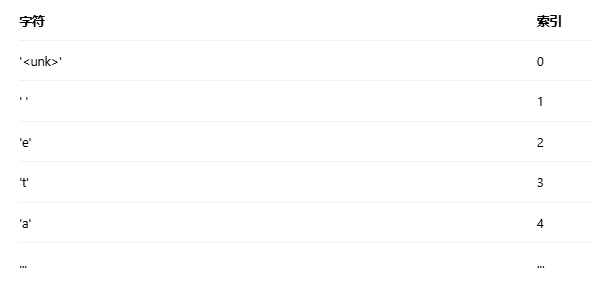

In [29]:
#batch_size, num_steps = 32, 35
#train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps) ÊàëÁâπ‰πàËøô‰∏™vocabÂú®ÂºÄÂ§¥ÂÆö‰πâÁöÑ„ÄÇ Âú®ËøôÈáåÂºïÁî®„ÄÇ ‰∏äÈù¢Â∞±ÊòØÊó∂Èó¥Êú∫Âô®ÁöÑvocab
predict_ch8('time traveller ', 10, net, vocab, d2l.try_gpu())

prefix[0]:  t
vocab[prefix[0]]:  3
outputs:  [3]
[outputs[-1]]:  [3]
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])
Y: torch.Size([1, 28])


'time traveller <unk>jdxxfqxco'

## [**Ê¢ØÂ∫¶Ë£ÅÂâ™**]

ÂØπ‰∫éÈïøÂ∫¶‰∏∫$T$ÁöÑÂ∫èÂàóÔºåÊàë‰ª¨Âú®Ëø≠‰ª£‰∏≠ËÆ°ÁÆóËøô$T$‰∏™Êó∂Èó¥Ê≠•‰∏äÁöÑÊ¢ØÂ∫¶Ôºå
Â∞Ü‰ºöÂú®ÂèçÂêë‰º†Êí≠ËøáÁ®ã‰∏≠‰∫ßÁîüÈïøÂ∫¶‰∏∫$\mathcal{O}(T)$ÁöÑÁü©Èòµ‰πòÊ≥ïÈìæ„ÄÇ
Â¶Ç :numref:`sec_numerical_stability`ÊâÄËø∞Ôºå
ÂΩì$T$ËæÉÂ§ßÊó∂ÔºåÂÆÉÂèØËÉΩÂØºËá¥Êï∞ÂÄº‰∏çÁ®≥ÂÆöÔºå
‰æãÂ¶ÇÂèØËÉΩÂØºËá¥Ê¢ØÂ∫¶ÁàÜÁÇ∏ÊàñÊ¢ØÂ∫¶Ê∂àÂ§±„ÄÇ
Âõ†Ê≠§ÔºåÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÂæÄÂæÄÈúÄË¶ÅÈ¢ùÂ§ñÁöÑÊñπÂºèÊù•ÊîØÊåÅÁ®≥ÂÆöËÆ≠ÁªÉ„ÄÇ

‰∏ÄËà¨Êù•ËØ¥ÔºåÂΩìËß£ÂÜ≥‰ºòÂåñÈóÆÈ¢òÊó∂ÔºåÊàë‰ª¨ÂØπÊ®°ÂûãÂèÇÊï∞ÈááÁî®Êõ¥Êñ∞Ê≠•È™§„ÄÇ
ÂÅáÂÆöÂú®ÂêëÈáèÂΩ¢ÂºèÁöÑ$\mathbf{x}$‰∏≠Ôºå
ÊàñËÄÖÂú®Â∞èÊâπÈáèÊï∞ÊçÆÁöÑË¥üÊ¢ØÂ∫¶$\mathbf{g}$ÊñπÂêë‰∏ä„ÄÇ
‰æãÂ¶ÇÔºå‰ΩøÁî®$\eta > 0$‰Ωú‰∏∫Â≠¶‰π†ÁéáÊó∂ÔºåÂú®‰∏ÄÊ¨°Ëø≠‰ª£‰∏≠Ôºå
Êàë‰ª¨Â∞Ü$\mathbf{x}$Êõ¥Êñ∞‰∏∫$\mathbf{x} - \eta \mathbf{g}$„ÄÇ
Â¶ÇÊûúÊàë‰ª¨Ëøõ‰∏ÄÊ≠•ÂÅáËÆæÁõÆÊ†áÂáΩÊï∞$f$Ë°®Áé∞ËâØÂ•ΩÔºå
Âç≥ÂáΩÊï∞$f$Âú®Â∏∏Êï∞$L$‰∏ãÊòØ*Âà©ÊôÆÂ∏åËå®ËøûÁª≠ÁöÑ*ÔºàLipschitz continuousÔºâ„ÄÇ
‰πüÂ∞±ÊòØËØ¥ÔºåÂØπ‰∫é‰ªªÊÑè$\mathbf{x}$Âíå$\mathbf{y}$Êàë‰ª¨ÊúâÔºö

$$|f(\mathbf{x}) - f(\mathbf{y})| \leq L \|\mathbf{x} - \mathbf{y}\|.$$

Âú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºåÊàë‰ª¨ÂèØ‰ª•ÂÆâÂÖ®Âú∞ÂÅáËÆæÔºö
Â¶ÇÊûúÊàë‰ª¨ÈÄöËøá$\eta \mathbf{g}$Êõ¥Êñ∞ÂèÇÊï∞ÂêëÈáèÔºåÂàô

$$|f(\mathbf{x}) - f(\mathbf{x} - \eta\mathbf{g})| \leq L \eta\|\mathbf{g}\|,$$

ËøôÊÑèÂë≥ÁùÄÊàë‰ª¨‰∏ç‰ºöËßÇÂØüÂà∞Ë∂ÖËøá$L \eta \|\mathbf{g}\|$ÁöÑÂèòÂåñ„ÄÇ
ËøôÊó¢ÊòØÂùè‰∫ã‰πüÊòØÂ•Ω‰∫ã„ÄÇ
ÂùèÁöÑÊñπÈù¢ÔºåÂÆÉÈôêÂà∂‰∫ÜÂèñÂæóËøõÂ±ïÁöÑÈÄüÂ∫¶Ôºõ
Â•ΩÁöÑÊñπÈù¢ÔºåÂÆÉÈôêÂà∂‰∫Ü‰∫ãÊÉÖÂèòÁ≥üÁöÑÁ®ãÂ∫¶ÔºåÂ∞§ÂÖ∂ÂΩìÊàë‰ª¨ÊúùÁùÄÈîôËØØÁöÑÊñπÂêëÂâçËøõÊó∂„ÄÇ

ÊúâÊó∂Ê¢ØÂ∫¶ÂèØËÉΩÂæàÂ§ßÔºå‰ªéËÄå‰ºòÂåñÁÆóÊ≥ïÂèØËÉΩÊó†Ê≥ïÊî∂Êïõ„ÄÇ
Êàë‰ª¨ÂèØ‰ª•ÈÄöËøáÈôç‰Ωé$\eta$ÁöÑÂ≠¶‰π†ÁéáÊù•Ëß£ÂÜ≥Ëøô‰∏™ÈóÆÈ¢ò„ÄÇ
‰ΩÜÊòØÂ¶ÇÊûúÊàë‰ª¨ÂæàÂ∞ëÂæóÂà∞Â§ßÁöÑÊ¢ØÂ∫¶Âë¢Ôºü
Âú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºåËøôÁßçÂÅöÊ≥ï‰ºº‰πéÊØ´Êó†ÈÅìÁêÜ„ÄÇ
‰∏Ä‰∏™ÊµÅË°åÁöÑÊõø‰ª£ÊñπÊ°àÊòØÈÄöËøáÂ∞ÜÊ¢ØÂ∫¶$\mathbf{g}$ÊäïÂΩ±ÂõûÁªôÂÆöÂçäÂæÑ
Ôºà‰æãÂ¶Ç$\theta$ÔºâÁöÑÁêÉÊù•Ë£ÅÂâ™Ê¢ØÂ∫¶$\mathbf{g}$„ÄÇ
Â¶Ç‰∏ãÂºèÔºö

(**$$\mathbf{g} \leftarrow \min\left(1, \frac{\theta}{\|\mathbf{g}\|}\right) \mathbf{g}.$$**)

ÈÄöËøáËøôÊ†∑ÂÅöÔºåÊàë‰ª¨Áü•ÈÅìÊ¢ØÂ∫¶ËåÉÊï∞Ê∞∏Ëøú‰∏ç‰ºöË∂ÖËøá$\theta$Ôºå
Âπ∂‰∏îÊõ¥Êñ∞ÂêéÁöÑÊ¢ØÂ∫¶ÂÆåÂÖ®‰∏é$\mathbf{g}$ÁöÑÂéüÂßãÊñπÂêëÂØπÈΩê„ÄÇ
ÂÆÉËøòÊúâ‰∏Ä‰∏™ÂÄºÂæóÊã•ÊúâÁöÑÂâØ‰ΩúÁî®Ôºå
Âç≥ÈôêÂà∂‰ªª‰ΩïÁªôÂÆöÁöÑÂ∞èÊâπÈáèÊï∞ÊçÆÔºà‰ª•ÂèäÂÖ∂‰∏≠‰ªª‰ΩïÁªôÂÆöÁöÑÊ†∑Êú¨ÔºâÂØπÂèÇÊï∞ÂêëÈáèÁöÑÂΩ±ÂìçÔºå
ËøôËµã‰∫à‰∫ÜÊ®°Âûã‰∏ÄÂÆöÁ®ãÂ∫¶ÁöÑÁ®≥ÂÆöÊÄß„ÄÇ
Ê¢ØÂ∫¶Ë£ÅÂâ™Êèê‰æõ‰∫Ü‰∏Ä‰∏™Âø´ÈÄü‰øÆÂ§çÊ¢ØÂ∫¶ÁàÜÁÇ∏ÁöÑÊñπÊ≥ïÔºå
ËôΩÁÑ∂ÂÆÉÂπ∂‰∏çËÉΩÂÆåÂÖ®Ëß£ÂÜ≥ÈóÆÈ¢òÔºå‰ΩÜÂÆÉÊòØ‰ºóÂ§öÊúâÊïàÁöÑÊäÄÊúØ‰πã‰∏Ä„ÄÇ

‰∏ãÈù¢Êàë‰ª¨ÂÆö‰πâ‰∏Ä‰∏™ÂáΩÊï∞Êù•Ë£ÅÂâ™Ê®°ÂûãÁöÑÊ¢ØÂ∫¶Ôºå
Ê®°ÂûãÊòØ‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞ÁöÑÊ®°ÂûãÊàñÁî±È´òÁ∫ßAPIÊûÑÂª∫ÁöÑÊ®°Âûã„ÄÇ
Êàë‰ª¨Âú®Ê≠§ËÆ°ÁÆó‰∫ÜÊâÄÊúâÊ®°ÂûãÂèÇÊï∞ÁöÑÊ¢ØÂ∫¶ÁöÑËåÉÊï∞„ÄÇ


In [33]:
def grad_clipping(net, theta):  #@save
    """Ë£ÅÂâ™Ê¢ØÂ∫¶"""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]#Ëøô‰∏™parasÂ≠òÂÇ®ÁöÑÊòØÊ¢ØÂ∫¶„ÄÇ
    else:
        params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))#ÊâÄÊúâÁöÑÊ¢ØÂ∫¶ÈÉΩË¶ÅËøõË°åÂâ™Ë£Å
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

## ËÆ≠ÁªÉ

Âú®ËÆ≠ÁªÉÊ®°Âûã‰πãÂâçÔºåËÆ©Êàë‰ª¨[**ÂÆö‰πâ‰∏Ä‰∏™ÂáΩÊï∞Âú®‰∏Ä‰∏™Ëø≠‰ª£Âë®ÊúüÂÜÖËÆ≠ÁªÉÊ®°Âûã**]„ÄÇ
ÂÆÉ‰∏éÊàë‰ª¨ËÆ≠ÁªÉ :numref:`sec_softmax_scratch`Ê®°ÂûãÁöÑÊñπÂºèÊúâ‰∏â‰∏™‰∏çÂêå‰πãÂ§Ñ„ÄÇ

1. Â∫èÂàóÊï∞ÊçÆÁöÑ‰∏çÂêåÈááÊ†∑ÊñπÊ≥ïÔºàÈöèÊú∫ÈááÊ†∑ÂíåÈ°∫Â∫èÂàÜÂå∫ÔºâÂ∞ÜÂØºËá¥ÈöêÁä∂ÊÄÅÂàùÂßãÂåñÁöÑÂ∑ÆÂºÇ„ÄÇ
1. Êàë‰ª¨Âú®Êõ¥Êñ∞Ê®°ÂûãÂèÇÊï∞‰πãÂâçË£ÅÂâ™Ê¢ØÂ∫¶„ÄÇ
   ËøôÊ†∑ÁöÑÊìç‰ΩúÁöÑÁõÆÁöÑÊòØÔºåÂç≥‰ΩøËÆ≠ÁªÉËøáÁ®ã‰∏≠Êüê‰∏™ÁÇπ‰∏äÂèëÁîü‰∫ÜÊ¢ØÂ∫¶ÁàÜÁÇ∏Ôºå‰πüËÉΩ‰øùËØÅÊ®°Âûã‰∏ç‰ºöÂèëÊï£„ÄÇ
1. Êàë‰ª¨Áî®Âõ∞ÊÉëÂ∫¶Êù•ËØÑ‰ª∑Ê®°Âûã„ÄÇÂ¶Ç :numref:`subsec_perplexity`ÊâÄËø∞Ôºå
   ËøôÊ†∑ÁöÑÂ∫¶ÈáèÁ°Æ‰øù‰∫Ü‰∏çÂêåÈïøÂ∫¶ÁöÑÂ∫èÂàóÂÖ∑ÊúâÂèØÊØîÊÄß„ÄÇ

ÂÖ∑‰ΩìÊù•ËØ¥ÔºåÂΩì‰ΩøÁî®È°∫Â∫èÂàÜÂå∫Êó∂Ôºå
Êàë‰ª¨Âè™Âú®ÊØè‰∏™Ëø≠‰ª£Âë®ÊúüÁöÑÂºÄÂßã‰ΩçÁΩÆÂàùÂßãÂåñÈöêÁä∂ÊÄÅ„ÄÇ
Áî±‰∫é‰∏ã‰∏Ä‰∏™Â∞èÊâπÈáèÊï∞ÊçÆ‰∏≠ÁöÑÁ¨¨$i$‰∏™Â≠êÂ∫èÂàóÊ†∑Êú¨
‰∏éÂΩìÂâçÁ¨¨$i$‰∏™Â≠êÂ∫èÂàóÊ†∑Êú¨Áõ∏ÈÇªÔºå
Âõ†Ê≠§ÂΩìÂâçÂ∞èÊâπÈáèÊï∞ÊçÆÊúÄÂêé‰∏Ä‰∏™Ê†∑Êú¨ÁöÑÈöêÁä∂ÊÄÅÔºå
Â∞ÜÁî®‰∫éÂàùÂßãÂåñ‰∏ã‰∏Ä‰∏™Â∞èÊâπÈáèÊï∞ÊçÆÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨ÁöÑÈöêÁä∂ÊÄÅ„ÄÇ
ËøôÊ†∑ÔºåÂ≠òÂÇ®Âú®ÈöêÁä∂ÊÄÅ‰∏≠ÁöÑÂ∫èÂàóÁöÑÂéÜÂè≤‰ø°ÊÅØ
ÂèØ‰ª•Âú®‰∏Ä‰∏™Ëø≠‰ª£Âë®ÊúüÂÜÖÊµÅÁªèÁõ∏ÈÇªÁöÑÂ≠êÂ∫èÂàó„ÄÇ
ÁÑ∂ËÄåÔºåÂú®‰ªª‰Ωï‰∏ÄÁÇπÈöêÁä∂ÊÄÅÁöÑËÆ°ÁÆóÔºå
ÈÉΩ‰æùËµñ‰∫éÂêå‰∏ÄËø≠‰ª£Âë®Êúü‰∏≠ÂâçÈù¢ÊâÄÊúâÁöÑÂ∞èÊâπÈáèÊï∞ÊçÆÔºå
Ëøô‰ΩøÂæóÊ¢ØÂ∫¶ËÆ°ÁÆóÂèòÂæóÂ§çÊùÇ„ÄÇ
‰∏∫‰∫ÜÈôç‰ΩéËÆ°ÁÆóÈáèÔºåÂú®Â§ÑÁêÜ‰ªª‰Ωï‰∏Ä‰∏™Â∞èÊâπÈáèÊï∞ÊçÆ‰πãÂâçÔºå
Êàë‰ª¨ÂÖàÂàÜÁ¶ªÊ¢ØÂ∫¶Ôºå‰ΩøÂæóÈöêÁä∂ÊÄÅÁöÑÊ¢ØÂ∫¶ËÆ°ÁÆóÊÄªÊòØÈôêÂà∂Âú®‰∏Ä‰∏™Â∞èÊâπÈáèÊï∞ÊçÆÁöÑÊó∂Èó¥Ê≠•ÂÜÖ„ÄÇ

ÂΩì‰ΩøÁî®ÈöèÊú∫ÊäΩÊ†∑Êó∂ÔºåÂõ†‰∏∫ÊØè‰∏™Ê†∑Êú¨ÈÉΩÊòØÂú®‰∏Ä‰∏™ÈöèÊú∫‰ΩçÁΩÆÊäΩÊ†∑ÁöÑÔºå
Âõ†Ê≠§ÈúÄË¶Å‰∏∫ÊØè‰∏™Ëø≠‰ª£Âë®ÊúüÈáçÊñ∞ÂàùÂßãÂåñÈöêÁä∂ÊÄÅ„ÄÇ
‰∏é :numref:`sec_softmax_scratch`‰∏≠ÁöÑ
`train_epoch_ch3`ÂáΩÊï∞Áõ∏ÂêåÔºå
`updater`ÊòØÊõ¥Êñ∞Ê®°ÂûãÂèÇÊï∞ÁöÑÂ∏∏Áî®ÂáΩÊï∞„ÄÇ
ÂÆÉÊó¢ÂèØ‰ª•ÊòØ‰ªéÂ§¥ÂºÄÂßãÂÆûÁé∞ÁöÑ`d2l.sgd`ÂáΩÊï∞Ôºå
‰πüÂèØ‰ª•ÊòØÊ∑±Â∫¶Â≠¶‰π†Ê°ÜÊû∂‰∏≠ÂÜÖÁΩÆÁöÑ‰ºòÂåñÂáΩÊï∞„ÄÇ


In [34]:
#@save
def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """ËÆ≠ÁªÉÁΩëÁªú‰∏Ä‰∏™Ëø≠‰ª£Âë®ÊúüÔºàÂÆö‰πâËßÅÁ¨¨8Á´†Ôºâ"""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # ËÆ≠ÁªÉÊçüÂ§±‰πãÂíå,ËØçÂÖÉÊï∞Èáè
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # Âú®Á¨¨‰∏ÄÊ¨°Ëø≠‰ª£Êàñ‰ΩøÁî®ÈöèÊú∫ÊäΩÊ†∑Êó∂ÂàùÂßãÂåñstate
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple): #isinstance(net, nn.Module): Âà§Êñ≠ netÊòØÂê¶ÊòØPyTorchÂÜÖÁΩÆÊ®°ÂùóÔºàÂ¶Ç nn.LSTM, nn.GRUÔºâ„ÄÇ
                # stateÂØπ‰∫énn.GRUÊòØ‰∏™Âº†Èáè
                state.detach_()
            else:
                # stateÂØπ‰∫énn.LSTMÊàñÂØπ‰∫éÊàë‰ª¨‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞ÁöÑÊ®°ÂûãÊòØ‰∏™Âº†Èáè
                for s in state:
                    s.detach_()
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        l = loss(y_hat, y.long()).mean()#ÈöæÈÅì‰∏çÊòØÊòØ‰∏Ä‰∏™batch Êúâmean
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # Âõ†‰∏∫Â∑≤ÁªèË∞ÉÁî®‰∫ÜmeanÂáΩÊï∞
            updater(batch_size=1)
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

[**Âæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÁöÑËÆ≠ÁªÉÂáΩÊï∞Êó¢ÊîØÊåÅ‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞Ôºå
‰πüÂèØ‰ª•‰ΩøÁî®È´òÁ∫ßAPIÊù•ÂÆûÁé∞„ÄÇ**]


In [35]:
#@save
def train_ch8(net, train_iter, vocab, lr, num_epochs, device,
              use_random_iter=False):
    """ËÆ≠ÁªÉÊ®°ÂûãÔºàÂÆö‰πâËßÅÁ¨¨8Á´†Ôºâ"""
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[10, num_epochs])
    # ÂàùÂßãÂåñ
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab, device)
    # ËÆ≠ÁªÉÂíåÈ¢ÑÊµã
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
            net, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller'))
            animator.add(epoch + 1, [ppl])
    print(f'Âõ∞ÊÉëÂ∫¶ {ppl:.1f}, {speed:.1f} ËØçÂÖÉ/Áßí {str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))

[**Áé∞Âú®ÔºåÊàë‰ª¨ËÆ≠ÁªÉÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°Âûã„ÄÇ**]
Âõ†‰∏∫Êàë‰ª¨Âú®Êï∞ÊçÆÈõÜ‰∏≠Âè™‰ΩøÁî®‰∫Ü10000‰∏™ËØçÂÖÉÔºå
ÊâÄ‰ª•Ê®°ÂûãÈúÄË¶ÅÊõ¥Â§öÁöÑËø≠‰ª£Âë®ÊúüÊù•Êõ¥Â•ΩÂú∞Êî∂Êïõ„ÄÇ


Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([3

KeyboardInterrupt: 

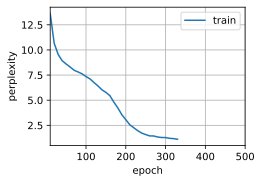

In [36]:
num_epochs, lr = 500, 1
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu())

[**ÊúÄÂêéÔºåËÆ©Êàë‰ª¨Ê£ÄÊü•‰∏Ä‰∏ã‰ΩøÁî®ÈöèÊú∫ÊäΩÊ†∑ÊñπÊ≥ïÁöÑÁªìÊûú„ÄÇ**]


Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([32, 28])
Y: torch.Size([3

KeyboardInterrupt: 

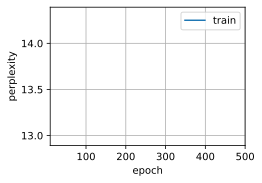

In [37]:
net = RNNModelScratch(len(vocab), num_hiddens, d2l.try_gpu(), get_params,
                      init_rnn_state, rnn)
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu(),
          use_random_iter=True)

‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞‰∏äËø∞Âæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÔºå
ËôΩÁÑ∂ÊúâÊåáÂØºÊÑè‰πâÔºå‰ΩÜÊòØÂπ∂‰∏çÊñπ‰æø„ÄÇ
Âú®‰∏ã‰∏ÄËäÇ‰∏≠ÔºåÊàë‰ª¨Â∞ÜÂ≠¶‰π†Â¶Ç‰ΩïÊîπËøõÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°Âûã„ÄÇ
‰æãÂ¶ÇÔºåÂ¶Ç‰Ωï‰ΩøÂÖ∂ÂÆûÁé∞Âú∞Êõ¥ÂÆπÊòìÔºå‰∏îËøêË°åÈÄüÂ∫¶Êõ¥Âø´„ÄÇ

## Â∞èÁªì

* Êàë‰ª¨ÂèØ‰ª•ËÆ≠ÁªÉ‰∏Ä‰∏™Âü∫‰∫éÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÁöÑÂ≠óÁ¨¶Á∫ßËØ≠Ë®ÄÊ®°ÂûãÔºåÊ†πÊçÆÁî®Êà∑Êèê‰æõÁöÑÊñáÊú¨ÁöÑÂâçÁºÄÁîüÊàêÂêéÁª≠ÊñáÊú¨„ÄÇ
* ‰∏Ä‰∏™ÁÆÄÂçïÁöÑÂæ™ÁéØÁ•ûÁªèÁΩëÁªúËØ≠Ë®ÄÊ®°ÂûãÂåÖÊã¨ËæìÂÖ•ÁºñÁ†Å„ÄÅÂæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÂíåËæìÂá∫ÁîüÊàê„ÄÇ
* Âæ™ÁéØÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÂú®ËÆ≠ÁªÉ‰ª•ÂâçÈúÄË¶ÅÂàùÂßãÂåñÁä∂ÊÄÅÔºå‰∏çËøáÈöèÊú∫ÊäΩÊ†∑ÂíåÈ°∫Â∫èÂàíÂàÜ‰ΩøÁî®ÂàùÂßãÂåñÊñπÊ≥ï‰∏çÂêå„ÄÇ
* ÂΩì‰ΩøÁî®È°∫Â∫èÂàíÂàÜÊó∂ÔºåÊàë‰ª¨ÈúÄË¶ÅÂàÜÁ¶ªÊ¢ØÂ∫¶‰ª•ÂáèÂ∞ëËÆ°ÁÆóÈáè„ÄÇ
* Âú®ËøõË°å‰ªª‰ΩïÈ¢ÑÊµã‰πãÂâçÔºåÊ®°ÂûãÈÄöËøáÈ¢ÑÁÉ≠ÊúüËøõË°åËá™ÊàëÊõ¥Êñ∞Ôºà‰æãÂ¶ÇÔºåËé∑ÂæóÊØîÂàùÂßãÂÄºÊõ¥Â•ΩÁöÑÈöêÁä∂ÊÄÅÔºâ„ÄÇ
* Ê¢ØÂ∫¶Ë£ÅÂâ™ÂèØ‰ª•Èò≤Ê≠¢Ê¢ØÂ∫¶ÁàÜÁÇ∏Ôºå‰ΩÜ‰∏çËÉΩÂ∫îÂØπÊ¢ØÂ∫¶Ê∂àÂ§±„ÄÇ

## ÁªÉ‰π†

1. Â∞ùËØïËØ¥ÊòéÁã¨ÁÉ≠ÁºñÁ†ÅÁ≠â‰ª∑‰∫é‰∏∫ÊØè‰∏™ÂØπË±°ÈÄâÊã©‰∏çÂêåÁöÑÂµåÂÖ•Ë°®Á§∫„ÄÇ
1. ÈÄöËøáË∞ÉÊï¥Ë∂ÖÂèÇÊï∞ÔºàÂ¶ÇËø≠‰ª£Âë®ÊúüÊï∞„ÄÅÈöêËóèÂçïÂÖÉÊï∞„ÄÅÂ∞èÊâπÈáèÊï∞ÊçÆÁöÑÊó∂Èó¥Ê≠•Êï∞„ÄÅÂ≠¶‰π†ÁéáÁ≠âÔºâÊù•ÊîπÂñÑÂõ∞ÊÉëÂ∫¶„ÄÇ
    * Âõ∞ÊÉëÂ∫¶ÂèØ‰ª•ÈôçÂà∞Â§öÂ∞ëÔºü
    * Áî®ÂèØÂ≠¶‰π†ÁöÑÂµåÂÖ•Ë°®Á§∫ÊõøÊç¢Áã¨ÁÉ≠ÁºñÁ†ÅÔºåÊòØÂê¶‰ºöÂ∏¶Êù•Êõ¥Â•ΩÁöÑË°®Áé∞Ôºü
    * Â¶ÇÊûúÁî®H.G.WellsÁöÑÂÖ∂‰ªñ‰π¶‰Ωú‰∏∫Êï∞ÊçÆÈõÜÊó∂ÊïàÊûúÂ¶Ç‰ΩïÔºå
      ‰æãÂ¶Ç[*‰∏ñÁïåÂ§ßÊàò*](http://www.gutenberg.org/ebooks/36)Ôºü
1. ‰øÆÊîπÈ¢ÑÊµãÂáΩÊï∞Ôºå‰æãÂ¶Ç‰ΩøÁî®ÈááÊ†∑ÔºåËÄå‰∏çÊòØÈÄâÊã©ÊúÄÊúâÂèØËÉΩÁöÑ‰∏ã‰∏Ä‰∏™Â≠óÁ¨¶„ÄÇ
    * ‰ºöÂèëÁîü‰ªÄ‰πàÔºü
    * Ë∞ÉÊï¥Ê®°Âûã‰Ωø‰πãÂÅèÂêëÊõ¥ÂèØËÉΩÁöÑËæìÂá∫Ôºå‰æãÂ¶ÇÔºåÂΩì$\alpha > 1$Ôºå‰ªé$q(x_t \mid x_{t-1}, \ldots, x_1) \propto P(x_t \mid x_{t-1}, \ldots, x_1)^\alpha$‰∏≠ÈááÊ†∑„ÄÇ
1. Âú®‰∏çË£ÅÂâ™Ê¢ØÂ∫¶ÁöÑÊÉÖÂÜµ‰∏ãËøêË°åÊú¨ËäÇ‰∏≠ÁöÑ‰ª£Á†Å‰ºöÂèëÁîü‰ªÄ‰πàÔºü
1. Êõ¥ÊîπÈ°∫Â∫èÂàíÂàÜÔºå‰ΩøÂÖ∂‰∏ç‰ºö‰ªéËÆ°ÁÆóÂõæ‰∏≠ÂàÜÁ¶ªÈöêÁä∂ÊÄÅ„ÄÇËøêË°åÊó∂Èó¥‰ºöÊúâÂèòÂåñÂêóÔºüÂõ∞ÊÉëÂ∫¶Âë¢Ôºü
1. Áî®ReLUÊõøÊç¢Êú¨ËäÇ‰∏≠‰ΩøÁî®ÁöÑÊøÄÊ¥ªÂáΩÊï∞ÔºåÂπ∂ÈáçÂ§çÊú¨ËäÇ‰∏≠ÁöÑÂÆûÈ™å„ÄÇÊàë‰ª¨ËøòÈúÄË¶ÅÊ¢ØÂ∫¶Ë£ÅÂâ™ÂêóÔºü‰∏∫‰ªÄ‰πàÔºü


[Discussions](https://discuss.d2l.ai/t/2103)
